In [1]:
!pip install chromedriver_autoinstaller

In [33]:
!pip install selenium==4.0.0

  Attempting uninstall: selenium
    Found existing installation: selenium 4.3.0
    Uninstalling selenium-4.3.0:
      Successfully uninstalled selenium-4.3.0


In [5]:
!conda activate se4

In [6]:
!pip install pandas

In [1]:
# 네이버에서 검색어 입력받아 검색 한 후 블로그 메뉴를 선택하고
# 오른쪽에 있는 검색옵션 버튼을 눌러서
# 정렬 방식과 기간을 입력하기

#Step 0. 필요한 모듈과 라이브러리를 로딩합니다.
import sys # 시스템
import os  # 시스템

import pandas as pd  # 판다스 : 데이터분석 라이브러리
import numpy as np   # 넘파이 : 숫자, 행렬 데이터 라이브러리

import chromedriver_autoinstaller
from bs4 import BeautifulSoup    # html 데이터를 전처리
from selenium import webdriver   # 웹 브라우저 자동화
import time    # 서버와 통신할 때 중간중간 시간 지연. 보통은 1초
from tqdm import tqdm_notebook   # for문 돌릴 때 진행상황을 %게이지로 알려준다.

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# python 버전 확인
!python --version

Python 3.9.12


In [3]:
# 판다스 버전 확인
pd.__version__

'1.4.2'

In [4]:
#!pip install selenium

In [5]:
# 검색어, 검색 기간 정의
query_txt = input('1.크롤링할 키워드는 무엇입니까?: 정치, 경제, 사회, 생활/문화, IT/과학, 세계')

1.크롤링할 키워드는 무엇입니까?: 정치, 경제, 사회, 생활/문화, IT/과학, 세계경제


In [6]:
query_txt

'경제'

In [7]:
pwd

'C:\\Users\\jeongkpa\\Desktop\\718 (2)'

In [8]:
options = webdriver.ChromeOptions()
chrome_path = chromedriver_autoinstaller.install()
driver = webdriver.Chrome(chrome_path, options=options)

# 사이트 주소는 네이버
driver.get('http://www.naver.com')
time.sleep(2)  # 2초간 정지

In [9]:
# # Step 2. 네이버 검색창에 "검색어" 검색
# element = driver.find_element_by_id("query")
# element.send_keys(query_txt)  # query_txt는 위에서 입력한 키워드
# element.submit()
# time.sleep(1)

In [10]:
# 'VIEW' 클릭
driver.find_element_by_link_text("뉴스").click( )
time.sleep(1)

In [11]:
# '쿼리' 클릭
driver.find_element_by_link_text(f"{query_txt}").click( )
time.sleep(1)

In [12]:
# 헤드라인 수집
title_list = []

# URL_raw 크롤링 시작
articles = ".cluster_text_headline"
article_raw = driver.find_elements_by_css_selector(articles)
article_raw[0].text

'올해 들어 서울 부동산 임대차 계약 폭증...월세가 절반'

In [13]:
# 밑에 자르기
article_raw = article_raw[:-16]

In [14]:
# 잘 나오는지 검토
for i in range(0, len(article_raw)):
    print(article_raw[i].text)
    title_list.append(article_raw[i].text)

올해 들어 서울 부동산 임대차 계약 폭증...월세가 절반
올해 들어 서울 부동산 임대차 계약 폭증…둘 중 하나가 월세
금리 상승기, 집값 '뚝뚝'…기준금리 3%대까지 오르면? [부릿지]
올해 들어 서울 부동산 임대차 계약 폭증…둘 중 하나가 월세
올 여름 휴가철 고속도로 이날 가장 막힌다…휴가지방향 30일·귀경방향 31일 [부동산360]
여름휴가철 고속도로 '7말8초' 가장 붐벼…91.2% "승용차 이용"
여름휴가철 고속도로 '7말8초' 가장 붐벼‥91.2% "승용차 이용"
여름 휴가철 시작…“8,892만 명 이동 예상·방역 강화”
최태원 "BTS, 부산엑스포 유치에 천군만마…게임 끝났다"
BTS, 2030 부산엑스포 홍보대사로 뛴다
BTS, 2030 부산세계박람회 홍보대사 위촉
방탄소년단, 2030부산세계박람회 홍보대사 공식 위촉
롯데카드, 로카머니 스크린골프 대회 시즌 2 개최
골프존, 2Q 호실적…하반기 해외 수출 증가·성수기 효과 기대-SK
IT·플랫폼 무대 진출…금융 BTS 키운다
"돌다리도 두드리는 日보다 늦어…규제개혁 속도 붙여야"
美 옐런, 추경호 만나 "러시아산 원유 가격 상한제 논의"
추경호·옐런 “필요시 외화유동성 공급”...한미 통화스와프 가능성


In [15]:
title_list

['올해 들어 서울 부동산 임대차 계약 폭증...월세가 절반',
 '올해 들어 서울 부동산 임대차 계약 폭증…둘 중 하나가 월세',
 "금리 상승기, 집값 '뚝뚝'…기준금리 3%대까지 오르면? [부릿지]",
 '올해 들어 서울 부동산 임대차 계약 폭증…둘 중 하나가 월세',
 '올 여름 휴가철 고속도로 이날 가장 막힌다…휴가지방향 30일·귀경방향 31일 [부동산360]',
 '여름휴가철 고속도로 \'7말8초\' 가장 붐벼…91.2% "승용차 이용"',
 '여름휴가철 고속도로 \'7말8초\' 가장 붐벼‥91.2% "승용차 이용"',
 '여름 휴가철 시작…“8,892만 명 이동 예상·방역 강화”',
 '최태원 "BTS, 부산엑스포 유치에 천군만마…게임 끝났다"',
 'BTS, 2030 부산엑스포 홍보대사로 뛴다',
 'BTS, 2030 부산세계박람회 홍보대사 위촉',
 '방탄소년단, 2030부산세계박람회 홍보대사 공식 위촉',
 '롯데카드, 로카머니 스크린골프 대회 시즌 2 개최',
 '골프존, 2Q 호실적…하반기 해외 수출 증가·성수기 효과 기대-SK',
 'IT·플랫폼 무대 진출…금융 BTS 키운다',
 '"돌다리도 두드리는 日보다 늦어…규제개혁 속도 붙여야"',
 '美 옐런, 추경호 만나 "러시아산 원유 가격 상한제 논의"',
 '추경호·옐런 “필요시 외화유동성 공급”...한미 통화스와프 가능성']

In [16]:
# 첫번째 글의 url 확인
article_raw[0].get_attribute('href')

'https://n.news.naver.com/mnews/article/052/0001766238?sid=101'

In [17]:
# 잘 나오는지 검토
url_list = []
for i in range(0, len(article_raw)):
    print(article_raw[i].get_attribute('href'))
    url_list.append(article_raw[i].get_attribute('href'))

https://n.news.naver.com/mnews/article/052/0001766238?sid=101
https://n.news.naver.com/mnews/article/001/0013321906?sid=101
https://n.news.naver.com/mnews/article/008/0004772825?sid=101
https://n.news.naver.com/mnews/article/056/0011305468?sid=101
https://n.news.naver.com/mnews/article/016/0002017964?sid=101
https://n.news.naver.com/mnews/article/001/0013322120?sid=101
https://n.news.naver.com/mnews/article/214/0001210255?sid=101
https://n.news.naver.com/mnews/article/056/0011305459?sid=101
https://n.news.naver.com/mnews/article/421/0006227847?sid=101
https://n.news.naver.com/mnews/article/020/0003440963?sid=101
https://n.news.naver.com/mnews/article/032/0003160936?sid=101
https://n.news.naver.com/mnews/article/016/0002017836?sid=101
https://n.news.naver.com/mnews/article/014/0004870171?sid=101
https://n.news.naver.com/mnews/article/018/0005271307?sid=101
https://n.news.naver.com/mnews/article/008/0004772819?sid=101
https://n.news.naver.com/mnews/article/011/0004077949?sid=101
https://

In [18]:
url_list

['https://n.news.naver.com/mnews/article/052/0001766238?sid=101',
 'https://n.news.naver.com/mnews/article/001/0013321906?sid=101',
 'https://n.news.naver.com/mnews/article/008/0004772825?sid=101',
 'https://n.news.naver.com/mnews/article/056/0011305468?sid=101',
 'https://n.news.naver.com/mnews/article/016/0002017964?sid=101',
 'https://n.news.naver.com/mnews/article/001/0013322120?sid=101',
 'https://n.news.naver.com/mnews/article/214/0001210255?sid=101',
 'https://n.news.naver.com/mnews/article/056/0011305459?sid=101',
 'https://n.news.naver.com/mnews/article/421/0006227847?sid=101',
 'https://n.news.naver.com/mnews/article/020/0003440963?sid=101',
 'https://n.news.naver.com/mnews/article/032/0003160936?sid=101',
 'https://n.news.naver.com/mnews/article/016/0002017836?sid=101',
 'https://n.news.naver.com/mnews/article/014/0004870171?sid=101',
 'https://n.news.naver.com/mnews/article/018/0005271307?sid=101',
 'https://n.news.naver.com/mnews/article/008/0004772819?sid=101',
 'https://

In [19]:
driver.get("https://n.news.naver.com/mnews/article/001/0013319994?sid=101")

# URL_raw 크롤링 시작
articles = ".go_trans._article_content"
article_raw = driver.find_elements_by_css_selector(articles)
article_raw[0].text

'경실련 분석…"문 정부 때 2배로…MB정부 당시 하락은 분양가상한제 등 영향"\n\n\n"서울 아파트값 18년 전보다 4배 올라…강남-비강남 격차 최대"\n[연합뉴스 자료사진]\n\n\n(서울=연합뉴스) 홍규빈 기자 = 지난 18년간 서울 아파트 한 채 값이 평균 9억원 넘게 상승하면서 4배 가까이 뛰어올랐다는 분석이 나왔다.\n\n경제정의실천시민연합(경실련)은 19일 기자회견을 열고 2004년 1월부터 올해 5월까지 서울 시내 75개 아파트 단지 12만4천 세대의 시세 변동을 분석한 결과를 발표했다. 조사는 KB부동산 시세정보를 활용해 이들 아파트의 3.3㎡(1평)당 가격 평균치를 시점별로 구하는 방식으로 이뤄졌다.\n\n분석 결과에 따르면 30평형 기준으로 2004년 3억4천만원이던 아파트 가격이 올해 5월 12억8천만원으로 약 3.8배 오른 것으로 나타났다.\n\n서울 아파트 시세 및 노동자 연임금 추이\n[경실련 제공. 재판매 및 DB금지]\n\n\n정권별 임기 말 기준으로 살펴보면 노무현 정부(2008년 1월) 때 5억2천500만원으로 올랐고, 이명박 정부(2013년 1월) 때는 4억9천100만원로 하락했다.\n\n박근혜 정부에서 다시 집값이 오르기 시작해 2017년 5월 5억9천900만원을 기록했고, 문재인 정부 임기 말인 올해 5월에는 12억7천800만원으로 2배 넘게 뛰어올랐다.\n\n경실련은 "2010∼2014년 집값 하락 시기는 분양가 상한제가 전면 시행되고 강남·서초의 900만원대 반값아파트와 600만원대 토지임대 건물분양아파트가 공급됐을 때"라며 "반면 지난 5년 동안은 3기 신도시, 공공재개발 등 투기를 조장하는 공급 확대책이 발표될 때마다 아파트값이 상승했다"고 분석했다.\n\n그러면서 "윤석열 정부는 무분별한 규제 완화를 중단하고 공공 역할을 강화해 저렴한 공공주택을 공급해야 한다"며 "선분양제 민간아파트는 분양가 상한제를 전면 의무화하고 후분양제 이행 방안을 제시해야 한다"고 촉구했다.\n\n강남-비강남 아파트 시세 추이\n[경실

In [20]:
# 이미지 크롤링 시작
img_id = "img1"
img_raw = driver.find_element_by_id(img_id)
img_raw.get_attribute('src')

'https://imgnews.pstatic.net/image/001/2022/07/19/PYH2022051709770001300_P4_20220719113817410.jpg?type=w647'

In [21]:
article_raw[0].text.split('\n\n\n')

['경실련 분석…"문 정부 때 2배로…MB정부 당시 하락은 분양가상한제 등 영향"',
 '"서울 아파트값 18년 전보다 4배 올라…강남-비강남 격차 최대"\n[연합뉴스 자료사진]',
 '(서울=연합뉴스) 홍규빈 기자 = 지난 18년간 서울 아파트 한 채 값이 평균 9억원 넘게 상승하면서 4배 가까이 뛰어올랐다는 분석이 나왔다.\n\n경제정의실천시민연합(경실련)은 19일 기자회견을 열고 2004년 1월부터 올해 5월까지 서울 시내 75개 아파트 단지 12만4천 세대의 시세 변동을 분석한 결과를 발표했다. 조사는 KB부동산 시세정보를 활용해 이들 아파트의 3.3㎡(1평)당 가격 평균치를 시점별로 구하는 방식으로 이뤄졌다.\n\n분석 결과에 따르면 30평형 기준으로 2004년 3억4천만원이던 아파트 가격이 올해 5월 12억8천만원으로 약 3.8배 오른 것으로 나타났다.\n\n서울 아파트 시세 및 노동자 연임금 추이\n[경실련 제공. 재판매 및 DB금지]',
 '정권별 임기 말 기준으로 살펴보면 노무현 정부(2008년 1월) 때 5억2천500만원으로 올랐고, 이명박 정부(2013년 1월) 때는 4억9천100만원로 하락했다.\n\n박근혜 정부에서 다시 집값이 오르기 시작해 2017년 5월 5억9천900만원을 기록했고, 문재인 정부 임기 말인 올해 5월에는 12억7천800만원으로 2배 넘게 뛰어올랐다.\n\n경실련은 "2010∼2014년 집값 하락 시기는 분양가 상한제가 전면 시행되고 강남·서초의 900만원대 반값아파트와 600만원대 토지임대 건물분양아파트가 공급됐을 때"라며 "반면 지난 5년 동안은 3기 신도시, 공공재개발 등 투기를 조장하는 공급 확대책이 발표될 때마다 아파트값이 상승했다"고 분석했다.\n\n그러면서 "윤석열 정부는 무분별한 규제 완화를 중단하고 공공 역할을 강화해 저렴한 공공주택을 공급해야 한다"며 "선분양제 민간아파트는 분양가 상한제를 전면 의무화하고 후분양제 이행 방안을 제시해야 한다"고 촉구했다.\n\n강남-비강남 아파트 시세 추이\n[경실련 

In [22]:
def get_article_content(article_url):
    driver.get(article_url)

    # URL_raw 크롤링 시작
    articles = ".go_trans._article_content"
    article_raw = driver.find_elements_by_css_selector(articles)
    # 이미지 크롤링 시작
    img_id = "img1"
    try:
        img_raw = driver.find_element_by_id(img_id)
        img_url = img_raw.get_attribute('src')
    except:
        print("이미지 없음")
        img_url = None

    print('크롤링 완료')
    time.sleep(1)
    return article_raw[0].text , img_url

In [23]:
# 컨텐츠 확인
content_list = []
img_list = []

for u in url_list:
    content, img_url = get_article_content(u)
    content_list.append(content)
    img_list.append(img_url)

content_list

크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료
크롤링 완료


["부동산 매매 시장에서 유례 없는 '거래 절벽' 현상이 지속되는 가운데 올해 들어 서울 부동산의 임대차 계약이 폭증한 것으로 나타났습니다.\n\n법원 등기정보광장의 서울 지역 부동산 임대차 계약 확정일자 통계에 따르면 올해 상반기 임대차 계약 건수는 어제까지 신고된 것을 기준으로 46만4천684건에 달했습니다.\n\n등기정보광장 통계 자료가 2014년부터 공개된 이래 상반기 임대차 거래가 40만 건을 넘은 것은 올해가 처음입니다.\n\n지난해 상반기 임대차 거래량 대비 31.1% 증가한 수치입니다.\n\n고강도 대출 규제 지속과 금리 인상 압박에 따라 매매 수요가 급감한 상황에서 전세나 월세로 안주하는 수요가 커진 영향으로 풀이됩니다.\n\n전세 거래량의 경우 올해 상반기 21만8천620건으로 역대 최다를 기록했으며 작년 같은 기간의 거래량에 비해 11.6% 늘었습니다.\n\n월세 거래량은 올해 상반기 24만6천64건으로 지난해 상반기 거래량보다 무려 55.2% 급증하며 역대로 가장 많았습니다.\n\n서울 임대차 시장에서 월세가 차지하는 비중은 2019년 42.3%, 2020년 42.4%, 지난해 44.7%로 미미한 수준의 상승 폭을 보이다가 올해 53.0%로 껑충 뛰었습니다.\n\n서울 부동산 시장에서 월세 계약 비율이 50%를 웃돌면서 전세 계약 비율을 역전한 것은 올해가 처음입니다.\n\n임대차 시장에서 전세의 월세화 현상이 가속화되는 이유는 대출 규제가 더욱 강해졌고, 금리도 계속 높아지면서 전세대출 이자보다 월세가 더 낮은 사례가 점점 많아지고 있기 때문으로 풀이됩니다.\n\n※ '당신의 제보가 뉴스가 됩니다'\n[카카오톡] YTN 검색해 채널 추가\n[전화] 02-398-8585\n[메일] social@ytn.co.kr",
 '상반기 임대차 40만건 첫 돌파…월세 55% 늘며 시장변화 주도\n고가 월세 거래도 최다…"매매·임대차 가격 분리 상황 전개"\n\n\n올해 들어 서울 부동산 임대차 계약 폭증…둘 중 하나가 월세\n[연합뉴스 자료사진]\n\

In [24]:
img_list

['https://imgnews.pstatic.net/image/052/2022/07/20/202207200840082548_t_20220720084902193.jpg?type=w647',
 'https://imgnews.pstatic.net/image/001/2022/07/20/AKR20220720017700003_07_i_P4_20220720105912455.jpg?type=w647',
 'https://imgnews.pstatic.net/image/008/2022/07/20/0004772825_001_20220720060201019.jpg?type=w647',
 'https://imgnews.pstatic.net/image/056/2022/07/20/0011305468_001_20220720095501194.jpg?type=w647',
 'https://imgnews.pstatic.net/image/016/2022/07/20/20220505000245_0_20220720094501596.jpg?type=w647',
 'https://imgnews.pstatic.net/image/001/2022/07/20/PYH2021081502550001300_P4_20220720093110590.jpg?type=w647',
 'https://imgnews.pstatic.net/image/214/2022/07/20/0001210255_001_20220720104803113.jpg?type=w647',
 'https://imgnews.pstatic.net/image/056/2022/07/20/0011305459_001_20220720094801205.jpg?type=w647',
 'https://imgnews.pstatic.net/image/421/2022/07/19/0006227847_001_20220719174403668.jpg?type=w647',
 'https://imgnews.pstatic.net/image/020/2022/07/20/0003440963_001_2

In [25]:
df = pd.DataFrame(data=[title_list, url_list, content_list, img_list])

df = df.T

df.columns = (["title_list", "url_list", "content_list", "img_list"])

df

,title_list,url_list,content_list,img_list
0,올해 들어 서울 부동산 임대차 계약 폭증...월세가 절반,https://n.news.naver.com/mnews/article/052/000...,부동산 매매 시장에서 유례 없는 '거래 절벽' 현상이 지속되는 가운데 올해 들어 서...,https://imgnews.pstatic.net/image/052/2022/07/...
1,올해 들어 서울 부동산 임대차 계약 폭증…둘 중 하나가 월세,https://n.news.naver.com/mnews/article/001/001...,상반기 임대차 40만건 첫 돌파…월세 55% 늘며 시장변화 주도\n고가 월세 거래도...,https://imgnews.pstatic.net/image/001/2022/07/...
2,"금리 상승기, 집값 '뚝뚝'…기준금리 3%대까지 오르면? [부릿지]",https://n.news.naver.com/mnews/article/008/000...,"2020년 7월, 임대차2법 시행을 앞둔 전세시장이 들썩였다. 재건축 실거주 강화 ...",https://imgnews.pstatic.net/image/008/2022/07/...
3,올해 들어 서울 부동산 임대차 계약 폭증…둘 중 하나가 월세,https://n.news.naver.com/mnews/article/056/001...,부동산 매매 시장에서 유례 없는 '거래 절벽' 현상이 지속되는 가운데 올해 들어 서...,https://imgnews.pstatic.net/image/056/2022/07/...
4,올 여름 휴가철 고속도로 이날 가장 막힌다…휴가지방향 30일·귀경방향 31일 [부동...,https://n.news.naver.com/mnews/article/016/000...,하루 평균 445만명 휴가철 이동\n국토부 7월22일부터 8월10일까지 대책 시행\...,https://imgnews.pstatic.net/image/016/2022/07/...
5,"여름휴가철 고속도로 '7말8초' 가장 붐벼…91.2% ""승용차 이용""",https://n.news.naver.com/mnews/article/001/001...,휴가지 출발 차량 30일에 가장 많을듯…서울~강릉 최대 약 6시간\n7월 22일∼8...,https://imgnews.pstatic.net/image/001/2022/07/...
6,"여름휴가철 고속도로 '7말8초' 가장 붐벼‥91.2% ""승용차 이용""",https://n.news.naver.com/mnews/article/214/000...,[사진 제공: 연합뉴스]\n올여름 휴가철에는 7월 23일 부터 8월 5일까지 에 가...,https://imgnews.pstatic.net/image/214/2022/07/...
7,"여름 휴가철 시작…“8,892만 명 이동 예상·방역 강화”",https://n.news.naver.com/mnews/article/056/001...,본격적인 여름 휴가철을 맞아 정부가 모든 교통 시설의 방역 활동을 강화하기로 했습니...,https://imgnews.pstatic.net/image/056/2022/07/...
8,"최태원 ""BTS, 부산엑스포 유치에 천군만마…게임 끝났다""",https://n.news.naver.com/mnews/article/421/000...,"BTS, 2030부산세계박람회 홍보대사 위촉\n""BIE 회원국보다 많은 국가의 아미...",https://imgnews.pstatic.net/image/421/2022/07/...
9,"BTS, 2030 부산엑스포 홍보대사로 뛴다",https://n.news.naver.com/mnews/article/020/000...,글로벌 부산 콘서트 개최 등 활동\n방탄소년단이 2030 부산세계박람회 유치를 위한...,https://imgnews.pstatic.net/image/020/2022/07/...


In [40]:
!pip install request

ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request


In [50]:
import urllib
from urllib import request
from PIL import Image
from io import BytesIO

def print_img(img_url):
    url = img_url
    
    # request.urlopen()
    # HTTP Error 403: Forbidden 에러 때문에 하단의 소스 한 줄을 추가해주었다.
    req = urllib.request.Request(url, headers = {"User-Agent" : "Mozilla/5.0"})
    res = request.urlopen(req).read()

    # Image open
    urlopen_img = Image.open(BytesIO(res))

    display(urlopen_img)

In [51]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

경제분야의 최신 뉴스를 몇개를 보고 싶으신가요? (18까지 가능)3
1

 올해 들어 서울 부동산 임대차 계약 폭증...월세가 절반


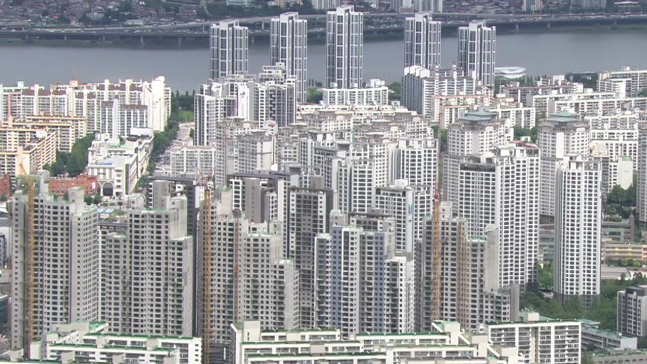



 부동산 매매 시장에서 유례 없는 '거래 절벽' 현상이 지속되는 가운데 올해 들어 서울 부동산의 임대차 계약이 폭증한 것으로 나타났습니다.

법원 등기정보광장의 서울 지역 부동산 임대차 계약 확정일자 통계에 따르면 올해 상반기 임대차 계약 건수는 어제까지 신고된 것을 기준으로 46만4천684건에 달했습니다.

등기정보광장 통계 자료가 2014년부터 공개된 이래 상반기 임대차 거래가 40만 건을 넘은 것은 올해가 처음입니다.

지난해 상반기 임대차 거래량 대비 31.1% 증가한 수치입니다.

고강도 대출 규제 지속과 금리 인상 압박에 따라 매매 수요가 급감한 상황에서 전세나 월세로 안주하는 수요가 커진 영향으로 풀이됩니다.

전세 거래량의 경우 올해 상반기 21만8천620건으로 역대 최다를 기록했으며 작년 같은 기간의 거래량에 비해 11.6% 늘었습니다.

월세 거래량은 올해 상반기 24만6천64건으로 지난해 상반기 거래량보다 무려 55.2% 급증하며 역대로 가장 많았습니다.

서울 임대차 시장에서 월세가 차지하는 비중은 2019년 42.3%, 2020년 42.4%, 지난해 44.7%로 미미한 수준의 상승 폭을 보이다가 올해 53.0%로 껑충 뛰었습니다.

서울 부동산 시장에서 월세 계약 비율이 50%를 웃돌면서 전세 계약 비율을 역전한 것은 올해가 처음입니다.

임대차 시장에서 전세의 월세화 현상이 가속화되는 이유는 대출 규제가 더욱 강해졌고, 금리도 계속 높아지면서 전세대출 이자보다 월세가 더 낮은 사례가 점점 많아지고 있기 때문으로 풀이됩니다.

※ '당신의 제보가 뉴스가 됩니다'
[카카오톡] YTN 검색해 채널 추가
[전화] 02-398-8585
[메일] social@ytn.co.kr
url이동: https://n.news.naver.com/mnews/article/052/0001766238?sid=101

2

 올해 들어 서울 부동산 임대차 계약 폭증…둘 중 하나가 월세


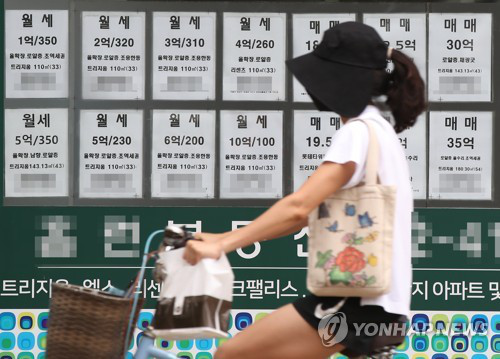



 상반기 임대차 40만건 첫 돌파…월세 55% 늘며 시장변화 주도
고가 월세 거래도 최다…"매매·임대차 가격 분리 상황 전개"


올해 들어 서울 부동산 임대차 계약 폭증…둘 중 하나가 월세
[연합뉴스 자료사진]


(서울=연합뉴스) 홍국기 기자 = 부동산 매매 시장에서 유례 없는 '거래 절벽' 현상이 지속되는 가운데 올해 들어 서울 부동산의 임대차 계약이 폭증한 것으로 나타났다.

20일 법원 등기정보광장의 서울 지역 부동산 임대차 계약 확정일자 통계에 따르면 올해 상반기(1∼6월) 임대차(전·월세) 계약 건수는 이날까지 신고된 것을 기준으로 46만4천684건에 달했다.

등기소와 주민센터에서 부여하는 확정일자 기준의 등기정보광장 통계 자료가 2014년부터 공개된 이래 상반기 임대차 거래가 40만건을 넘은 것은 올해가 처음이다.

지난해 상반기 임대차 거래량(35만4천512건) 대비 31.1% 증가한 수치다.

고강도 대출 규제 지속과 금리 인상 압박에 따라 매매 수요가 급감한 가운데 주택뿐 아니라 부동산 전반에 걸쳐 임대차 안주 수요가 커진 영향으로 풀이된다.

[그래픽] 서울 임대차 계약 건수 추이
(서울=연합뉴스) 김민지 기자
minfo@yna.co.kr
트위터 @yonhap_graphics 페이스북 tuney.kr/LeYN1


전세 거래량의 경우 올해 상반기 21만8천620건으로 역대 최다를 기록했다. 작년 같은 기간의 거래량(19만5천966건)과 비교해 11.6% 늘었다.

특히 월세는 증가 폭이 전세보다 훨씬 가팔랐다.

월세 거래량은 올해 상반기 24만6천64건으로 지난해 상반기 거래량(15만8천546건)보다 무려 55.2% 늘어나며 역대로 가장 많았다.

월세 거래량은 상반기 기준으로 2018년 13만6천266건, 2019년 14만1천929건, 2020년 15만1천501건, 지난해 15만8천546건에 이어 올해까지 4년 연속 증가세를 이어갔다.

서울 임대차 시장에서 월세가 차지하는 비중(상반기 기준)은 2019년 42.3%, 2020년 

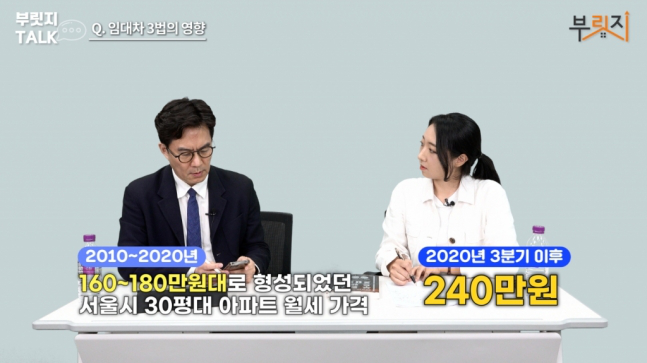



 2020년 7월, 임대차2법 시행을 앞둔 전세시장이 들썩였다. 재건축 실거주 강화 요건 등으로 어쩔 수 없이 내 집에 들어가야 하는 이들의 수요도 맞물리면서 전세 공급은 줄고 가격은 급등했다. 시장은 2년 뒤인 2022년 하반기 전세시장을 주목했다. 임대차법으로 4년간 묶여있던 전세 물량이 한 번에 시장에 풀리면서 가격이 크게 오를 수 있다는 것. 이 가운데 김경민 서울대학교 환경대학원 교수는 이미 전세시장은 우려와 달리 안정화됐으며 임대차법 영향은 미미할 것으로 봤다. 그 이유는 뭘까.☞머니투데이 부동산 유튜브 채널 '부릿지'가 김 교수와 주택시장의 움직임을 분석해봤다.


▶조한송 기자
책에서 지난 상승장에서 임대차3법이 시장에 미친 영향이 컸다고 언급하셨습니다. 다음 달이면 시행된지 2년이 되는데 그 영향은 어떨까요?

▶김경민 서울대학교 환경대학원 교수
임대차3법과 관련해서 정책의 취지와 부작용은 다르다고 말씀드리고 싶어요. 저는 임대차3법이 시행될 당시 시점에 대해서 비판했지 정책 자체가 나쁘다고 하지 않았어요. 우리나라가 경제협력개발기구(OECD) 평균 대비 임차인 보호 정책이 약하기 때문에 임대차법은 당연히 해야 한다고 봅니다. 다만 당시 전셋값과 매맷값이 동시에 뛰는 상황이었어요. 이런 정책이 나오면 가격이 오를 수밖에 없었어요. 모든 지표에서 증명됐고요. 당시 정책 실행이 성급했다고 봐요. 그렇다고 이 정책을 없애야 한다고 보진 않아요. 임대차3법은 중산층과 서민, 저소득층의 주거 복지 차원에서 매우 중요합니다. 주거복지는 두 가지입니다. 이들이 좀 더 오래 살게 하고 임대료가 덜 오르게 하는 건데 그게 임대차3법이에요. 다만 책에서 언급한 것은 시장이 굉장히 불안정한 시점에 그런 정책을 편 게 잘못됐다는 거죠.

▶조한송 기자
예. 공급이 적을 때 제도가 시행돼서 시장을 교란했다고 하셨어요.

▶김경민 서울대학교 환경대학원 교수
노태우 정권때 전세계약이 1년에서 2년으로 바뀌었어요.그때도 전셋값이 폭등했어요. 다만 2년 후에는 시장이 굉

In [53]:
num = int(input(f"{query_txt}분야의 최신 뉴스를 몇개를 보고 싶으신가요? ({len(content_list)}까지 가능)"))

print('=========================================================')
for i in range(num):
    temp = df.iloc[i]
    print(color.BOLD + f"{i+1}\n\n {temp.title_list}" + color.END)
    print_img(temp.img_list)
    print(f"\n\n {temp.content_list}")
    print(f"url이동: {temp.url_list}")
    print("==================================================\n")